# 1. Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision Tree

In [0]:
# import library pandas
import pandas as pd

#import library for classification using decision tree
from sklearn.tree import DecisionTreeClassifier

# 2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [0]:
# import matplotlib
# import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Import loan_data.csv.<br> Identifikasi tipe data dari masing-masing variable.<br> Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.<br>

## Load dataset

### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Load dataset from google drive

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/loan_data.csv')

## Show the first 5 rows

In [5]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Type of variable in dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Summary statistics of data

In [7]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# 4. Lakukan pengecekan missing data dan duplicated-row.<br> Jika ada, sebutkan kolom apa yang ada missing data.<br> Apakah ada duplicated-row?

## Checking Missing Values

In [8]:
# Checking missing values
data_missing = pd.DataFrame(data.isnull().sum()/len(data)).sort_values(by=0, ascending=False)
data_missing

,0
credit.policy,0.0
purpose,0.0
int.rate,0.0
installment,0.0
log.annual.inc,0.0
dti,0.0
fico,0.0
days.with.cr.line,0.0
revol.bal,0.0
revol.util,0.0


Dari hasil diatas dapat disimpulkan bahwa tidak terdapat missing values pada dataset 'loan'. Sehingga, pada analisis selanjutnya dapat digunakan dataset ini.

## Checking Duplicate Rows

In [9]:
# Checking Duplicate Rows
(data.duplicated(subset=None, keep='first')).sum()

0

Dihasilkan jumlah data yang duplicate pada dataset 'Loan' adalah '0'. Sehingga, dapat disimpulkan bahwa tidak ada data duplicate pada dataset 'Loan'.

# 5. Lakukan pengecekan variabel target.<br> Ada berapa kategori pada variable target?<br> Berapa proporsinya?<br> Lakukan visualisasi yang menunjukkan PROPORSI kelas target.<br>

## Define target variable

In [10]:
target = pd.DataFrame(data['not.fully.paid'])
target

,not.fully.paid
0,0
1,0
2,0
3,0
4,0
...,...
9573,1
9574,1
9575,1
9576,1


## Categorical in target variable

In [11]:
a = data['not.fully.paid'].unique()
print('Jumlah kategori pada variabel target (not.fully.paid) adalah', len(a),'.')

Jumlah kategori pada variabel target (not.fully.paid) adalah 2 .


## Proporsi of target variable

In [12]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Dari hasil diatas maka ada 8045 data yang memiliki class (0) dan 1533 data memiliki class (1).

## Visualization of target variable

### Pie Chart

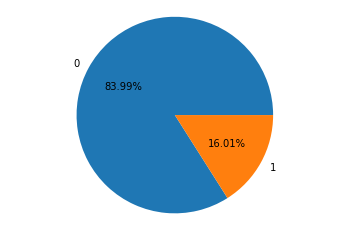

In [13]:
# Proporsi dari variabel target
import matplotlib.pyplot as plt

plt.pie(data['not.fully.paid'].value_counts(),labels=data['not.fully.paid'].unique(), autopct='%.2f%%')
plt.axis('equal')
plt.show()

Dari hasil pie chart diatas dapat diinterpretasikan bahwa ada 83,99% data yang mempunyai class (0) dan 16,01% data mempunyai class(1).

### Countplot

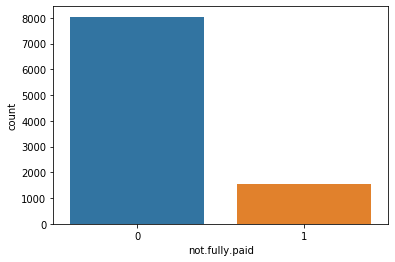

In [14]:
# Countplot dari variabel target
sns.countplot(data['not.fully.paid'])

# 6. Berapa variansi (ragam) nilai installment?

In [15]:
a = data['installment'].var()
print('Nilai Variansi dari variabel instalment adalah', a )

Nilai Variansi dari variabel instalment adalah 42878.52390484531


# 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [16]:
a = data['installment'].quantile(q=0.25)
b = data['installment'].quantile(q=0.75)
print('Nilai Simpangan Kuartil(Q3-Q1) dari variabel instalment adalah', b-a)

Nilai Simpangan Kuartil(Q3-Q1) dari variabel instalment adalah 268.99249999999995


# 8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)

In [17]:
a = data['installment'].groupby(data['purpose']).max()
print('Nilai installment tertinggi untuk masing-masing tujuan pinjaman :',a)

Nilai installment tertinggi untuk masing-masing tujuan pinjaman : purpose
all_other             916.95
credit_card           922.42
debt_consolidation    940.14
educational           861.88
home_improvement      902.06
major_purchase        898.55
small_business        926.83
Name: installment, dtype: float64


# 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman. Ada berapa kategori pada variable tersebut?<br> Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

## Jumlah Kategori pada variabel purpose

In [18]:
a = (data['purpose'].unique())
print('Jumlah Kategori pada variabel purpose adalah', len(a),'.')

Jumlah Kategori pada variabel purpose adalah 7 .


## Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

Text(0.5, 0, 'Type of Purpose')

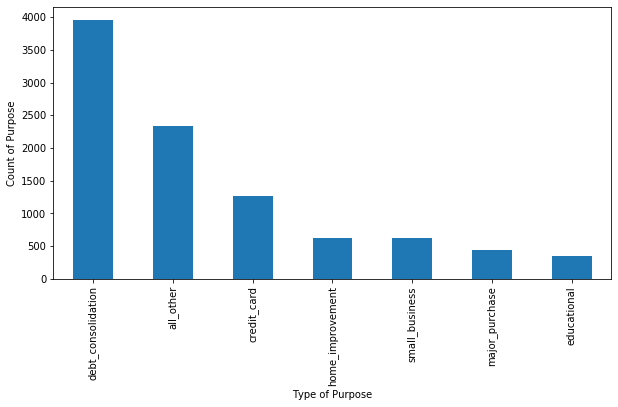

In [19]:
#Distribution of Class Target

data['purpose'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.ylabel('Count of Purpose')
plt.xlabel('Type of Purpose')

Dari hasil diatas terlihat bahwa jenis tujuan pinjaman yang paling diminati oleh customer adalah debt_consolidation. Dan yang paling sedikit adalah educational.

# 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.

## Correlation Coeficient

In [20]:
data.corr(method = 'spearman')

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.287878,0.073698,0.029398,-0.080286,0.352399,0.112885,-0.009222,-0.102636,-0.433860,-0.057772,-0.048692,-0.158119
int.rate,-0.287878,1.000000,0.242914,0.041648,0.216114,-0.744986,-0.133584,0.148719,0.472965,0.174137,0.172677,0.093887,0.152725
installment,0.073698,0.242914,1.000000,0.431405,0.062547,0.085257,0.201920,0.351844,0.096013,-0.006740,-0.007541,-0.027854,0.040404
log.annual.inc,0.029398,0.041648,0.431405,1.000000,-0.059672,0.107878,0.400251,0.415817,0.053172,0.030574,0.029732,0.013282,-0.035534
dti,-0.080286,0.216114,0.062547,-0.059672,1.000000,-0.214496,0.072858,0.375950,0.333655,0.028044,-0.018420,0.009311,0.035899
fico,0.352399,-0.744986,0.085257,0.107878,-0.214496,1.000000,0.251729,-0.094562,-0.520085,-0.173743,-0.237059,-0.148294,-0.147920
days.with.cr.line,0.112885,-0.133584,0.201920,0.400251,0.072858,0.251729,1.000000,0.323954,-0.004041,-0.042324,0.094645,0.101549,-0.025379
revol.bal,-0.009222,0.148719,0.351844,0.415817,0.375950,-0.094562,0.323954,1.000000,0.514898,-0.023088,-0.053657,-0.025633,0.020440
revol.util,-0.102636,0.472965,0.096013,0.053172,0.333655,-0.520085,-0.004041,0.514898,1.000000,-0.016175,-0.032189,0.071434,0.081448
inq.last.6mths,-0.433860,0.174137,-0.006740,0.030574,0.028044,-0.173743,-0.042324,-0.023088,-0.016175,1.000000,0.021115,0.055862,0.131478


Dari nilai korelasi dihasilkan bahwa nilai korelasi antara variabel fico dan variabel target 'not.fully.paid' adalah sebesar -0.147920, sehingga dapat disimpulkan bahwa korelasi kedua variabel negatif yang lemah. Artinya variabel 'fico' tidak potensial mempengaruhi hasil prediksi variabel target. 

## Visualisasi distribusi 'Fico' terhadap Target

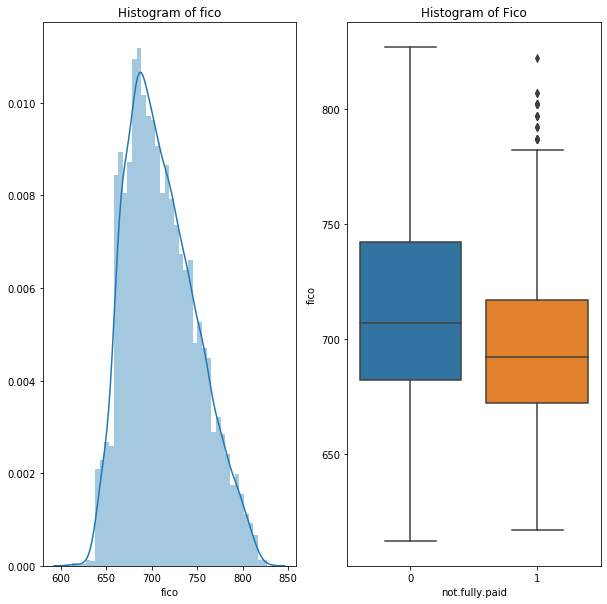

In [21]:
f=plt.figure(figsize=(10,10))

#plt.show()
f.add_subplot(1,2,1)
sns.distplot(data['fico'])
plt.title('Histogram of fico')

f.add_subplot(1,2,2)
sns.boxplot(x=data['not.fully.paid'], y=data['fico'])
plt.title('Histogram of Fico')


plt.show()


# 11.Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.

Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

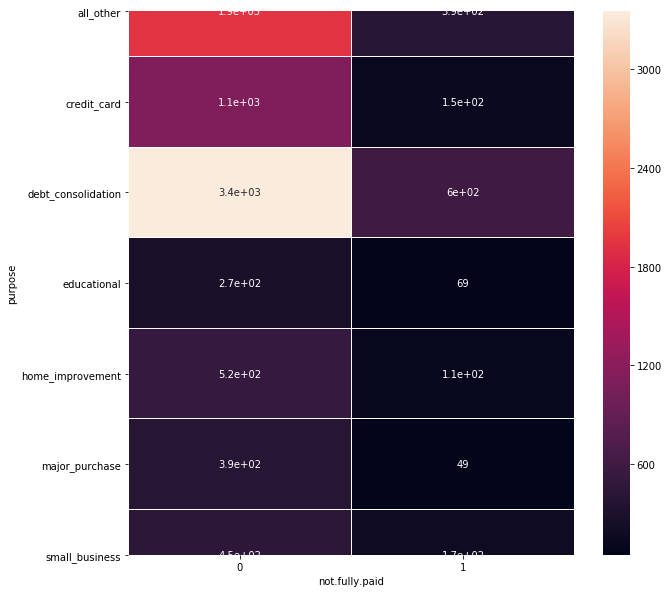

In [22]:
cross = pd.crosstab(data['purpose'], data['not.fully.paid'])
plt.figure(figsize=(10,10))
sns.heatmap(cross, linewidths=0.05, linecolor='white', annot=True)

Dari hasil diatas terlihat bahwa jenis tujuan peminjaman memiliki korelasi yang berbeda terhadap variabel target 'not.fully.paid'. Akhirnya disimpulkan bahwa 'purpose' tidak potensial terhadap variabel 'not.fully.paid'.

# 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [23]:
data_credit_card = data[data['purpose']=='credit_card']
a = data_credit_card['installment'].mean()
print('Rata-rata dari int.rate untuk purposes dengan kategori credit_card adalah', a)

Rata-rata dari int.rate untuk purposes dengan kategori credit_card adalah 319.5007131537243


# 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [24]:
data_baru = data[(data['installment']>200) & (data['purpose']=='educational')]
print('Jumlah kasus pinjaman yang nilai instalmentnya diatas 200 dan tujuan pinjaman untuk pendidikan adalah', len(data_baru),'.')

Jumlah kasus pinjaman yang nilai instalmentnya diatas 200 dan tujuan pinjaman untuk pendidikan adalah 137 .


# 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [25]:
loans3 = data[data['purpose']=='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


# 15. Siapkan data untuk pemodelan.

Ubah data kategorik menjadi dummy variabel.

Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

 

## Dummies Variable

In [26]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [27]:
final_data = pd.get_dummies(data, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [0]:
#Split variabel X and Y
X = final_data.drop('not.fully.paid',1)
y = final_data['not.fully.paid']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.3, random_state = 101)

In [30]:
print(X_train.shape)
print(X_test.shape)

(6704, 18)
(2874, 18)


# 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [0]:
 predictions=dtree.predict(X_test)

# 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [33]:
# Confusion Matrix dan Classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


[[1992  439]
 [ 341  102]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



# 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [34]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,predictions)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1992  439]
 [ 341  102]]
Accuracy :  0.7286012526096033
Sensitivity :  0.8194158782394076
Specificity :  0.23024830699774265


- Interpretasi Confusion Matrix:
> - 1992 artinya Ada 1992 data kelas positif yang diprediksi benar kelas positif. Kasus dimana orang diprediksi (Positif) fully.paid, memang benar(True) fuly.paid.
> - 102 artinya Ada 102 data kelas negatif yang diprediksi benar kelas negatif. Kasus dimana orang diprediksi (Positif) not.fully.paid, memang benar(True) not.fuly.paid.
> - 439 artinya Ada 439 data kelas positif yang diprediksi kelas negatif. Kasus dimana orang yang diprediksi positif fully.paid, ternyata not.fully.paid, Prediksinya salah (False).
> - 341 artinya Ada 341 data kelas negatif yang diprediksi kelas positif. Kasus dimana orang yang diprediksi not.fully.paid (Negatif), tetapi ternyata sebenarnya(TRUE) fully.paid.
- Accuracy = rasio prediksi Benar (positif dan negatif) dengan keseluruhan data. Sehingga, nilai accuracy = 0.73 artinya persentase model memprediksi secara benar baik kelas positif dan negatif sebesar 73%.
- Sensitifitas = rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Sehingga, nilai sensitivitas 0.81 artinya persentase model memprediksi benar kelas positif dari total kelas positif adalah sebesar 81%.
- Specitifitas = kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif. Sehingga, nilai specitifitas 0.24% artinya persentase model memprediksi kelas negatif dari total kelas negatif adalah 24%.
